### Reconocimiento facial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
sns.set()

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
# nos descargamos 200 megas de fotos para jugar con ellas
faces = fetch_lfw_people(min_faces_per_person=60)

In [5]:
# podemos ver ejemplos de personajes conocidos
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [6]:
print(faces.images.shape)

(1348, 62, 47)


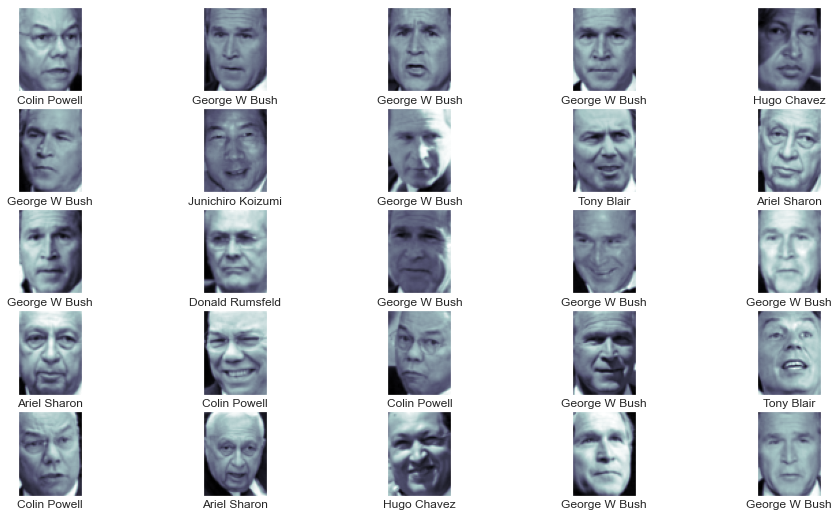

In [9]:
# podemos imprimir algunos ejemplos
fig,ax = plt.subplots(5,5, figsize=(16,9))
for i,ax_i in enumerate(ax.flat):
     #  ax.flat es un iterador del tamaño de los subplots(3,5)
     ax_i.imshow(faces.images[i],cmap="bone")
     # con xticks [] nos sale en blanco los ejes
     ax_i.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [ ]:
* usar cada pixel de cada foto como clasificador seria computacionalmente carisimo; se usa un procesado de imagen para extraer los datos principales y reducir dimensiones (ej con PCA)
*

In [12]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline # sirve para encadenar intrucciones

In [13]:
# usamos pca (elegimos un numero de muestras con n_components)
pca = PCA(n_components=150, random_state=42,whiten=True)
# usamos kernel rbf (que viene de serie ¡) por que son rasgos de caras mas circulares que rectas
# class_weight = balanced para que modelo escoga los rasgos principales
svc = SVC(kernel="rbf",class_weight="balanced")
# ahora hacemos pipeline
model = make_pipeline(pca,svc)

In [14]:
# pdemos hacer un cross validation o train/test split para testear el modelo
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(faces.data,faces.target, random_state=42)

In [15]:
# vamos hace un cross validation para testear parametros
from sklearn.model_selection import GridSearchCV

param_grid = {
    "svc__C":[0.1,1,5,10,50], # ojo cuantos mas pongamos mas tarda ¡
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01], # el gamma para las funciones radiales simpre es bajo
}
grid = GridSearchCV(model,param_grid)

%time grid.fit(X_train,Y_train)

Wall time: 1min 48s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [16]:
# vemos los mejores parametros ( si los parametros fueran los extremos, por ejemplo 0.1 o 50, habria que repetir el exerimento y ampliar los parametros, para asegurarnos que el resultado es el correcto y no que no haya podido seguir haciendo operanciones por ser el ultimo)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [18]:
classifier = grid.best_estimator_
yfit = classifier.predict(X_test)

Text(0.5, 0.98, 'predicciones de las imagenes (en rojo las incorrectas')

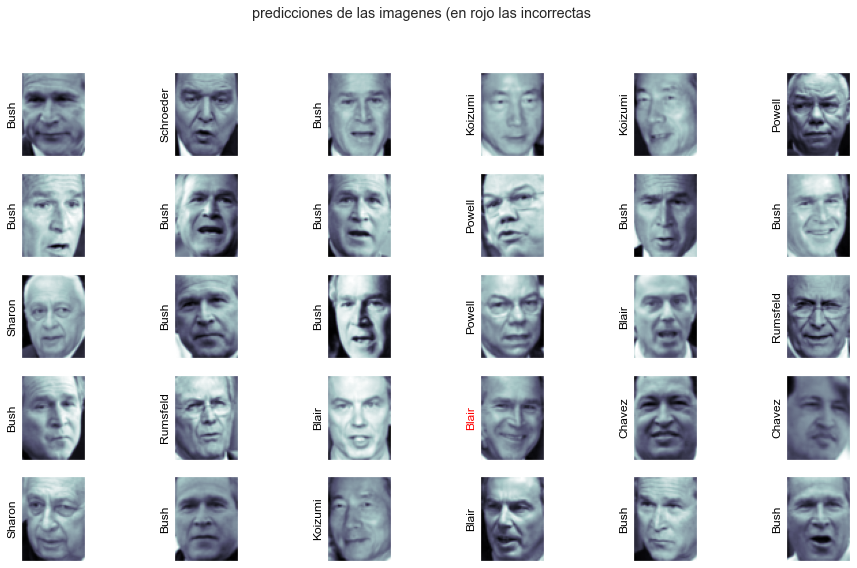

In [23]:
# podemos imprimir algunos ejemplos para ver si ha clasifcado bien
fig,ax = plt.subplots(5,6, figsize=(16,9))
for i,ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47),cmap="bone")     
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                    color= "black" if yfit[i]==Y_test[i] else "red")
    
fig.suptitle("predicciones de las imagenes (en rojo las incorrectas")

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [35]:
# tambien podemos pintanrlo
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test,yfit)

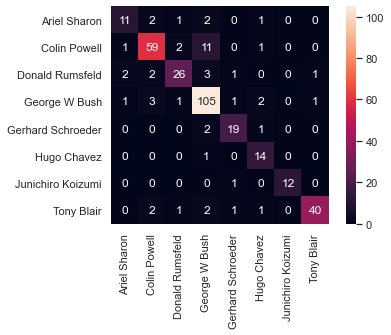

In [36]:
sns.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=True,
            xticklabels=faces.target_names,yticklabels=faces.target_names)

* normalmente con fotos se usarian otros modelos mas complejos ya que normalmente las fotos son de dirente tamaño, calidad, enfoques etc; en este ejemplo todas las fotas tenian el mismo formato y eso facilitaba el trabajo del modelo

### SVC regresion versus clasificacion

In [39]:
# vamos con el iris // hacemos shuffle porque los datos estan muy agrupados (los 50 primeros son una clase y asi..)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.utils import shuffle
from sklearn import datasets

In [40]:
 iris = datasets.load_iris()
 X = iris.data
 Y = iris.target

In [43]:
# hacemos shuffle
X, Y = shuffle(X,Y,random_state=0)

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=0,test_size=0.3)

In [46]:
parameters = [{
    "kernel":["rbf"],
    "gamma":[1e-4,1e-3,1e-2,0.1,0.2,0.5],
    "C": [1,10,100,1000]
    },
    {
    "kernel":["lineal"], # aqui no usamos gamma que es para rfb    
    "C": [1,10,100,1000]
    }]

In [47]:
# vemos los mejores parametros
clf = GridSearchCV(SVC(decision_function_shape="ovr"),param_grid=parameters,cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['lineal']}])

In [49]:
clf.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [52]:
# ahora podemos ver datos del cross validation
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]

for m,s,p in zip(means,stds,params):
    print(f"{round(m,2)} para +/-{round(2*s,2)} para {p}")


0.91 para +/-0.05 para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.91 para +/-0.05 para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.94 para +/-0.09 para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 para +/-0.1 para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.99 para +/-0.03 para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.97 para +/-0.08 para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.91 para +/-0.05 para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.94 para +/-0.09 para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.98 para +/-0.05 para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 para +/-0.08 para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.97 para +/-0.08 para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.96 para +/-0.1 para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.94 para +/-0.09 para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.98 para +/-0.05 para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.97 para +/-0.08 para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.95 para +/-0.09 para {'C'

In [53]:
y_pred = clf.predict(X_test)


In [54]:
print(classification_report(Y_test,y_pred,target_names=["setosa","versicolor","virginia"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.92      0.96        13
    virginia       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



### SVM para regresion

In [4]:
# vamos a preparar los datos, un poco dificil para que la regresion no sea tan clara (porque en ese caso usariamos el algoritmo de regresion lineal)
X = np.sort(5*np.random.rand(200,1),axis=0) # creamos 200 numeros hasta 1 pero lo multi por 5
Y = np.sin(X).ravel() # usamos el coseno de los valores X
# y a 40 valores le restamos una cantidad
Y[::5] += 3*(0.5 - np.random.rand(40))

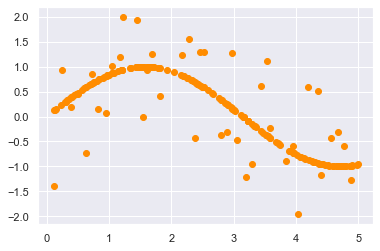

In [5]:
# vamos a ver que pinta tienen; vemos que hay una figura clara pero muchos puntos estan fuera
plt.scatter(X,Y,color="darkorange",label="data")

In [6]:
from sklearn.svm import SVR

In [11]:
# vamos a probar con varios kernels
C=1e3
svr_lin = SVR(kernel="linear",C=C)
svr_rbf = SVR(kernel="rbf",C=C,gamma=0.1)
svr_pol = SVR(kernel="poly",C=C,degree=3)

In [12]:
# vamos hacer unas predicciones con cada modelo ( nos saltamos otros pasos con validacion cruzada...aqui vamos al lio ¡¡)
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

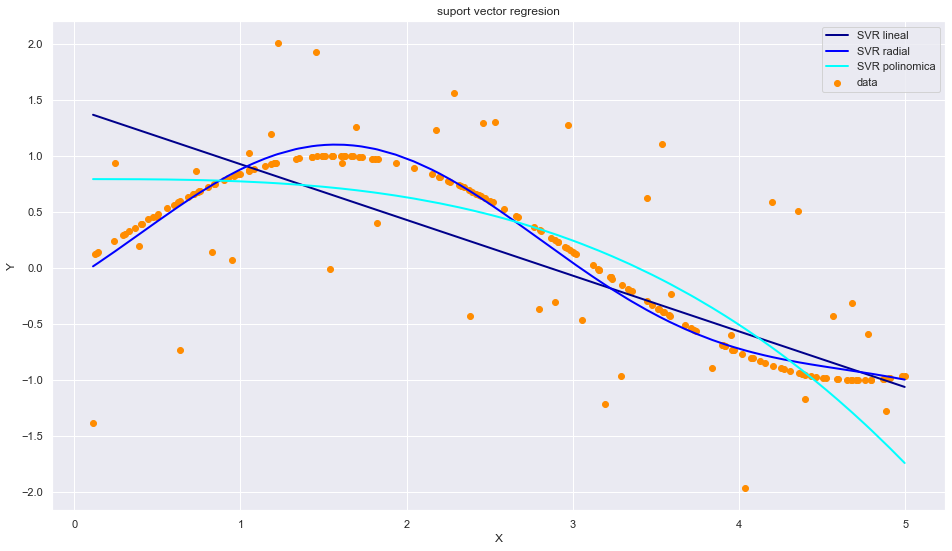

In [16]:
# Vamos a ver graficos
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange",label="data")
plt.plot(X,y_lin,color="darkblue",lw=lw,label="SVR lineal")
plt.plot(X,y_rbf,color="blue",lw=lw,label="SVR radial")
plt.plot(X,y_pol,color="cyan",lw=lw,label="SVR polinomica")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("suport vector regresion")
plt.legend()
plt.show()

In [ ]:
### Apuntes
* recomendable para datasets medianos, ya que consume muchos recursos
* no recomendable cuando hay muchas features o hay mucho ruido (muchos datos que estan fuera )
* proporciona pocos datos de la estimacion directa de la probalidad (solo con cross validation pero es costoso)